In [2]:
import numpy as np
import pandas as pd

In [3]:
# load file
labels_df = pd.read_csv('/kaggle/input/fake-or-real-the-impostor-hunt/data/train.csv')

text_true = [] 
text_fake = []

# for any article in file
for i, row in labels_df.iterrows():
    article_id = row['id']  # לדוגמה: article_0000
    real_id = row['real_text_id']   # 1 או 2
    str_article_id = 'article_' + str(i).zfill(4)  # ==> 'article_0005'

    #the pathes pf  articales
    file1_path = f'/kaggle/input/fake-or-real-the-impostor-hunt/data/train/{str_article_id}/file_1.txt'
    file2_path = f'/kaggle/input/fake-or-real-the-impostor-hunt/data/train/{str_article_id}/file_2.txt'

    
    #read texts
    with open(file1_path, 'r', encoding='utf-8') as f1:
        text1 = f1.read()

    with open(file2_path, 'r', encoding='utf-8') as f2:
        text2 = f2.read()

    #save file by true or fake
    if real_id == 1:
        text_true.append(text1)
        text_fake.append(text2)
    else:
        text_true.append(text2)
        text_fake.append(text1)

    # 94 files exists
    if i == 94:
        break

In [29]:
print(f"🟢 Real texts count: {len(text_true)}")
print(f"🔴 Fake texts count: {len(text_fake)}")

import re

def clean_and_split(text):
    #Return lowercase words from text without punctuation.
    return re.findall(r'\b\w+\b', text.lower())

zero_pair_text_in_file = []
min_len = min(len(text_true), len(text_fake))


for i in range(len(text_true)):
    true_words = clean_and_split(text_true[i])
    fake_words = clean_and_split(text_fake[i])
    both_words = [word for word in true_words if word in fake_words]
    if (len(both_words) == 0 ):
        zero_pair_text_in_file.append(i+1)
        print(f'🔎 Pair {i+1}: {len(both_words)}' )


if zero_pair_text_in_file:
    print(f"\n😶 No common words found in {len(zero_pair_text_in_file)} pairs: {zero_pair_text_in_file}")
else:
    print("\n🎉 All pairs have at least one common word!")

🟢 Real texts count: 95
🔴 Fake texts count: 95
🔎 Pair 11: 0
🔎 Pair 13: 0
🔎 Pair 15: 0

😶 No common words found in 3 pairs: [11, 13, 15]


In [32]:
df = pd.DataFrame({'True': text_true,'Fake': text_fake}) 

In [33]:
df.head()

True  \
0  The VIRSA (Visible Infrared Survey Telescope A...   
1  The project aims to achieve an accuracy level ...   
2  Scientists can learn about how galaxies form a...   
3  The importance for understanding how stars evo...   
4  Analyzing how fast stars rotate within a galax...   

                                                Fake  
0  The China relay network has released a signifi...  
1  China\nThe goal of this project involves achie...  
2  Dinosaur eggshells offer clues about what dino...  
3  China\nThe study suggests that multiple star s...  
4  Dinosaur Rex was excited about his new toy set...

🚀 -------------------- detect for True file --------------------
⏱️ file 0
🌟 Word Cloud for row 1


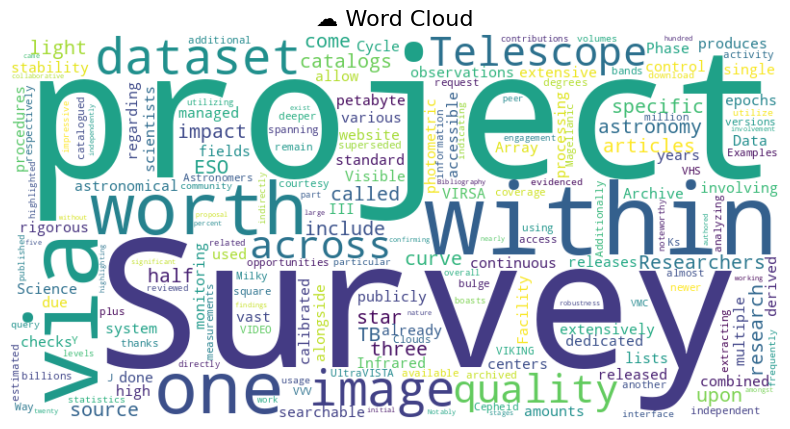

⏱️ file 1
🌟 Word Cloud for row 2


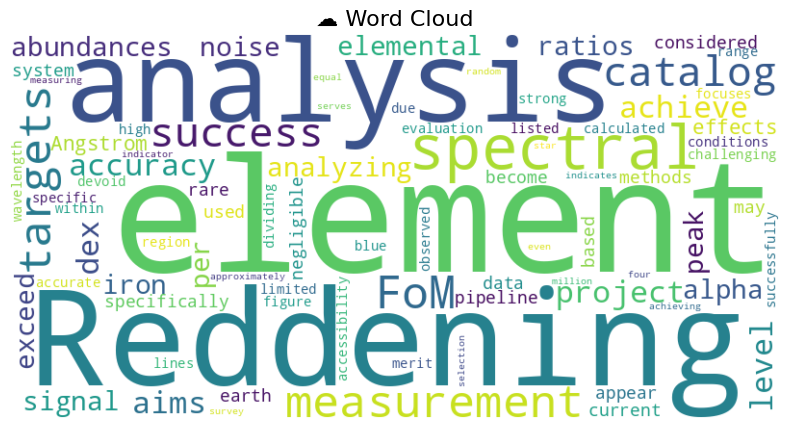

⏱️ file 2
🌟 Word Cloud for row 3


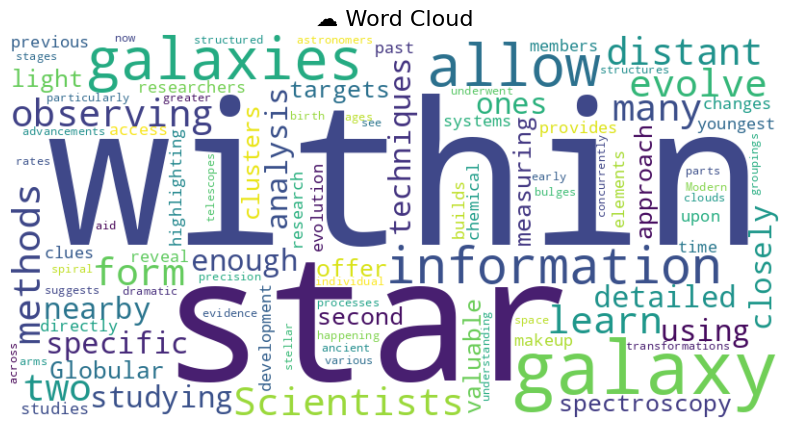

⏱️ file 3
🌟 Word Cloud for row 4


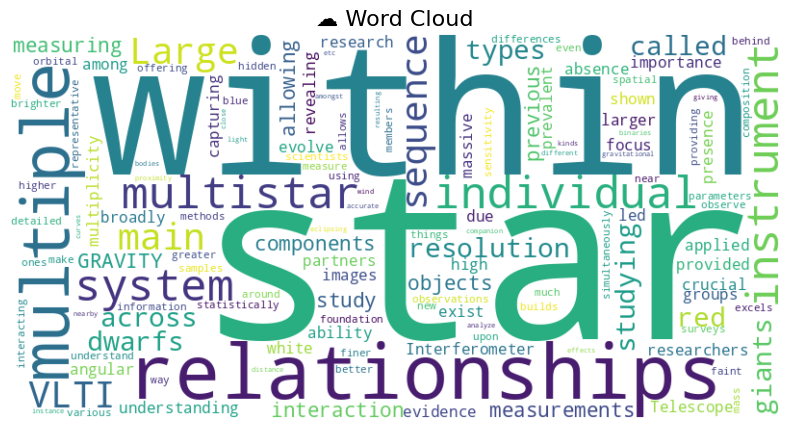

⏱️ file 4
🌟 Word Cloud for row 5


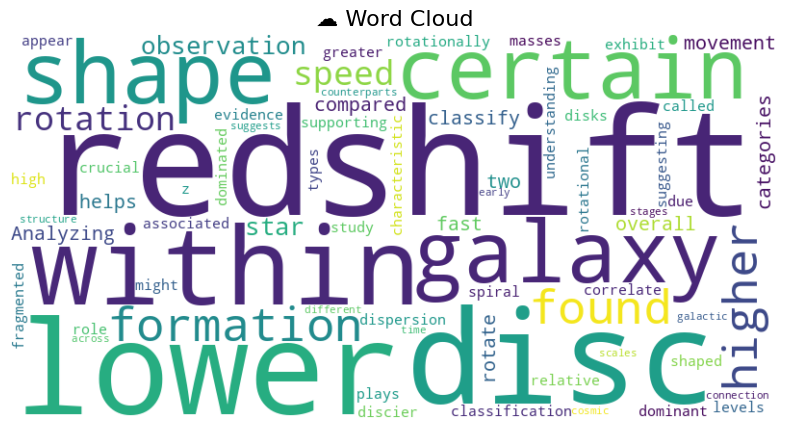

⏱️ file 5
🌟 Word Cloud for row 6


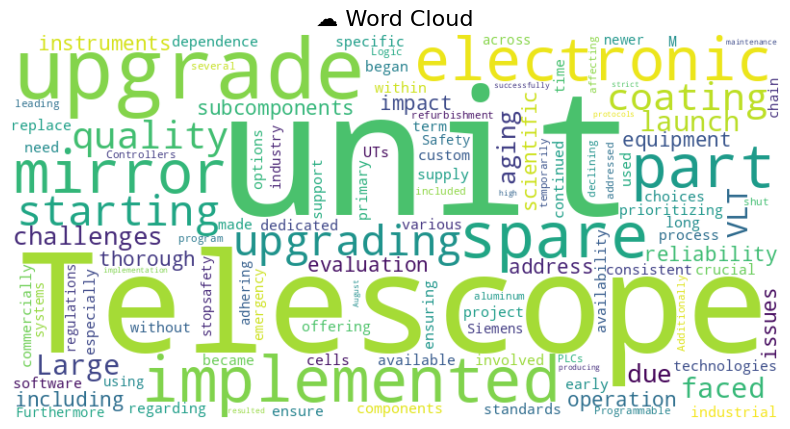

⏱️ file 6
🌟 Word Cloud for row 7


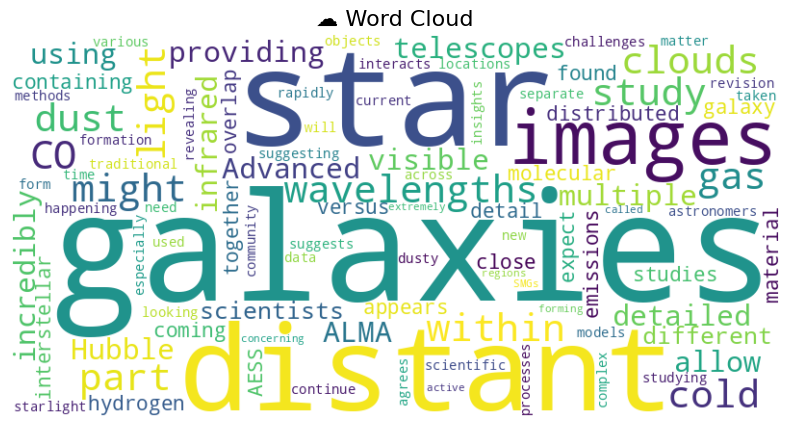

⏱️ file 7
🌟 Word Cloud for row 8


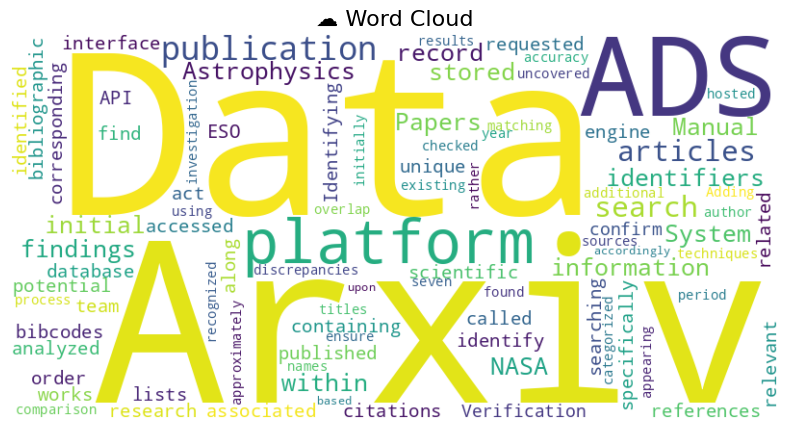

⏱️ file 8
🌟 Word Cloud for row 9


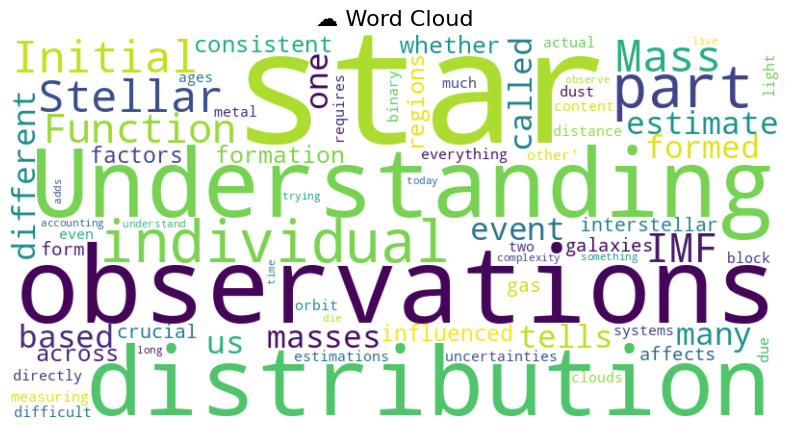

⏱️ file 9
🌟 Word Cloud for row 10


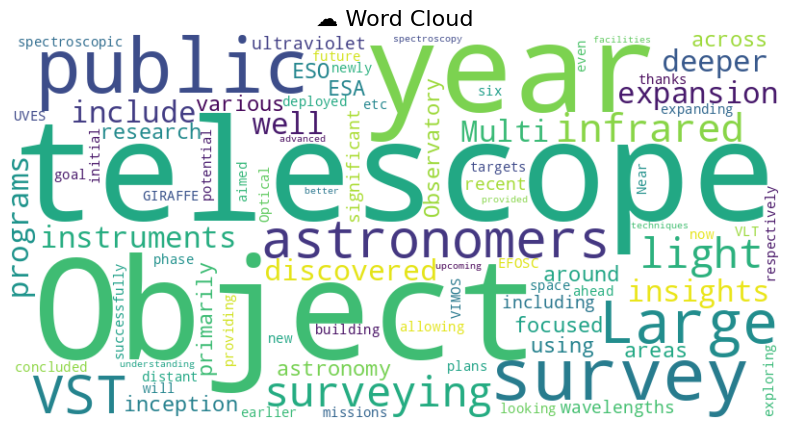

🚨 -------------------- detect for Fake file --------------------
⏱️ file 0
🌟 Word Cloud for row 1


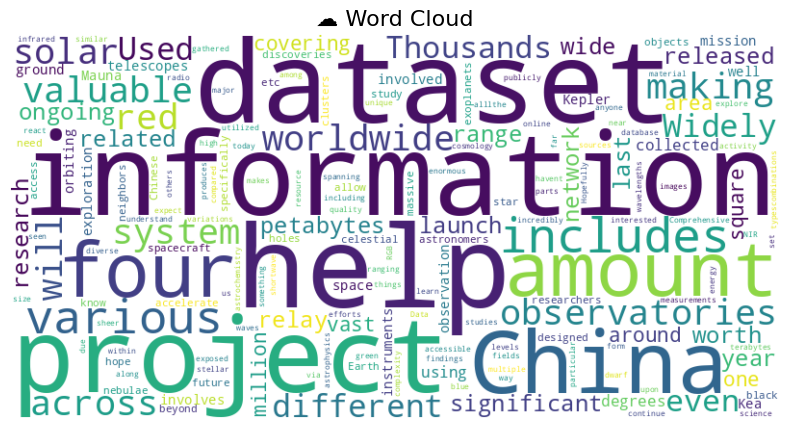

⏱️ file 1
🌟 Word Cloud for row 2


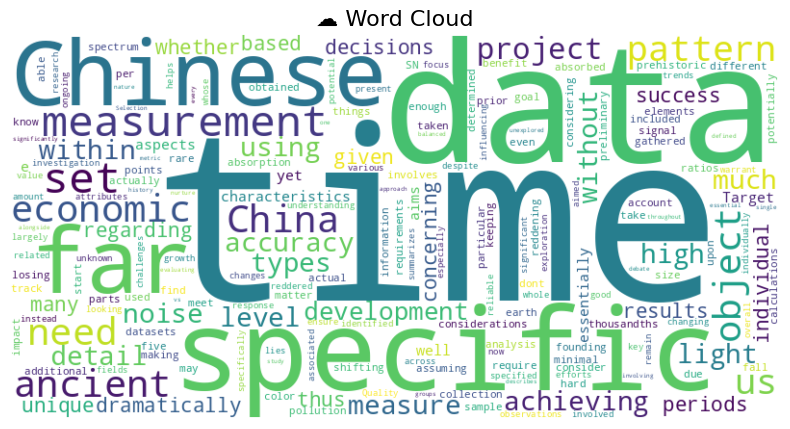

⏱️ file 2
🌟 Word Cloud for row 3


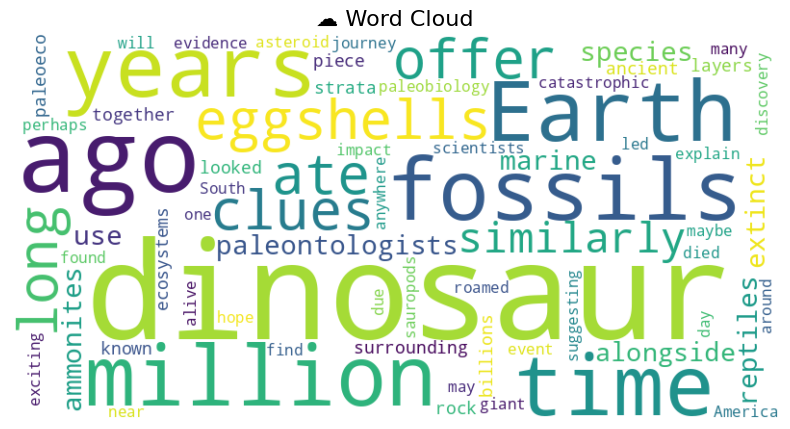

⏱️ file 3
🌟 Word Cloud for row 4


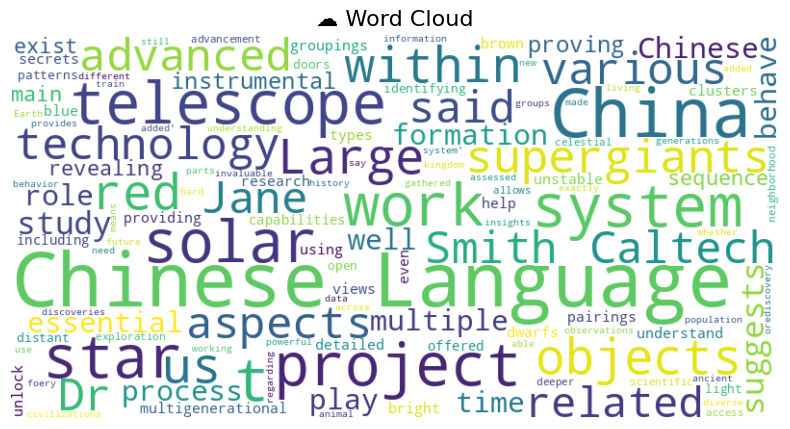

⏱️ file 4
🌟 Word Cloud for row 5


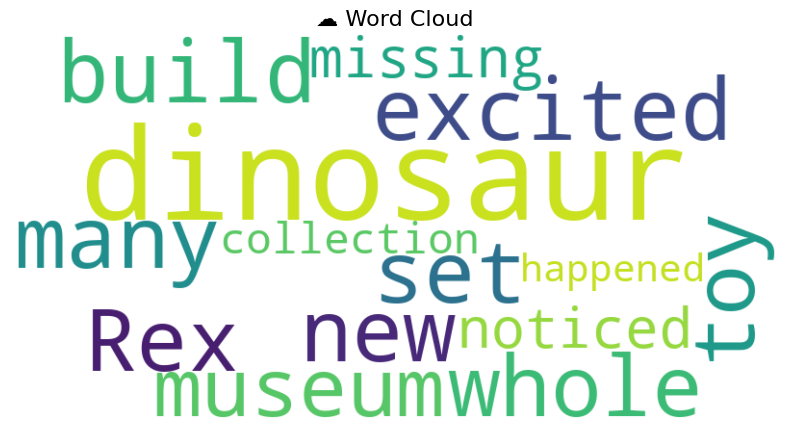

⏱️ file 5
🌟 Word Cloud for row 6


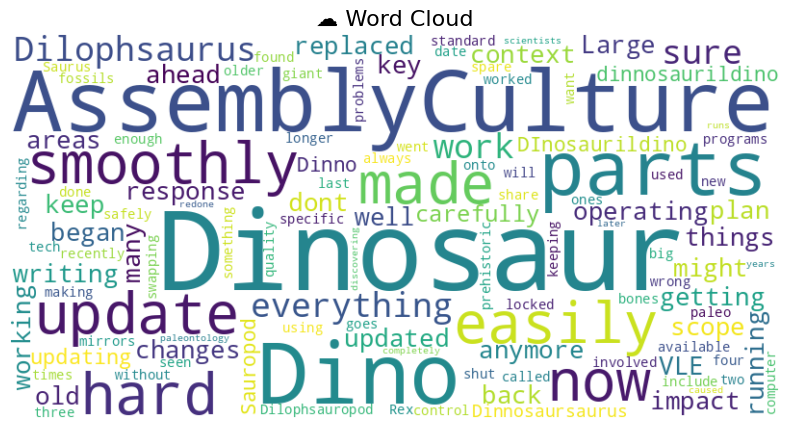

⏱️ file 6
🌟 Word Cloud for row 7


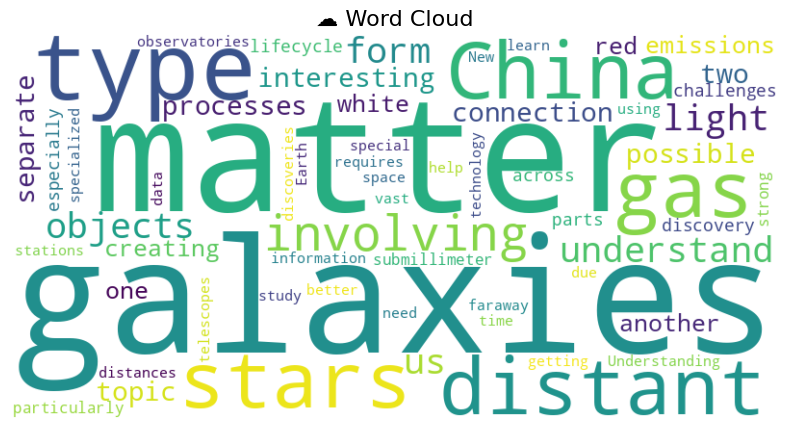

⏱️ file 7
🌟 Word Cloud for row 8


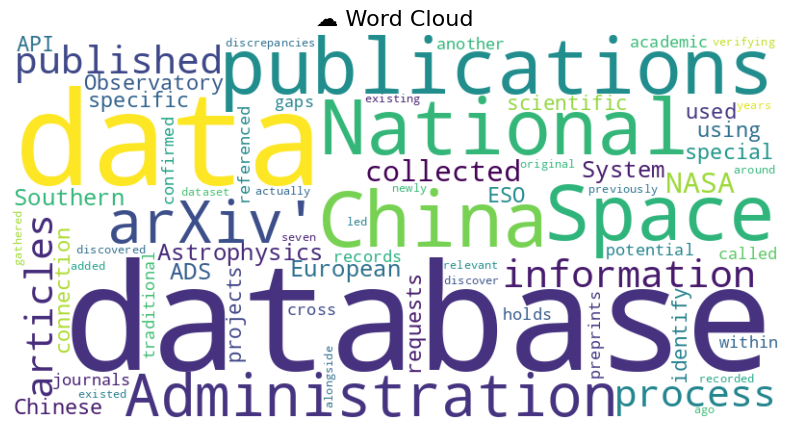

⏱️ file 8
🌟 Word Cloud for row 9


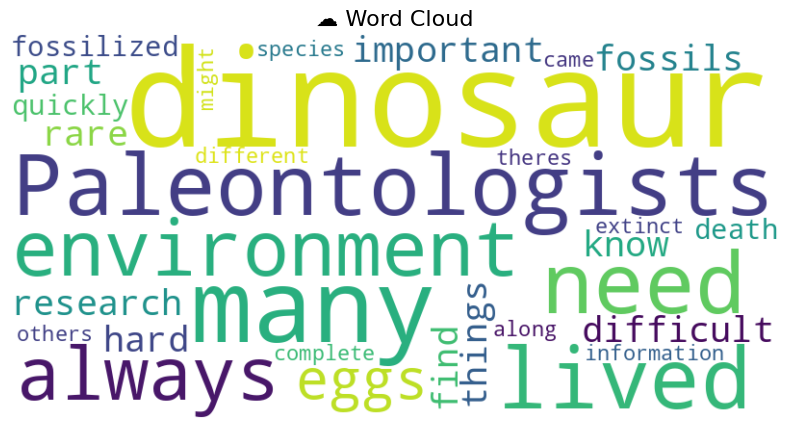

⏱️ file 9
🌟 Word Cloud for row 10


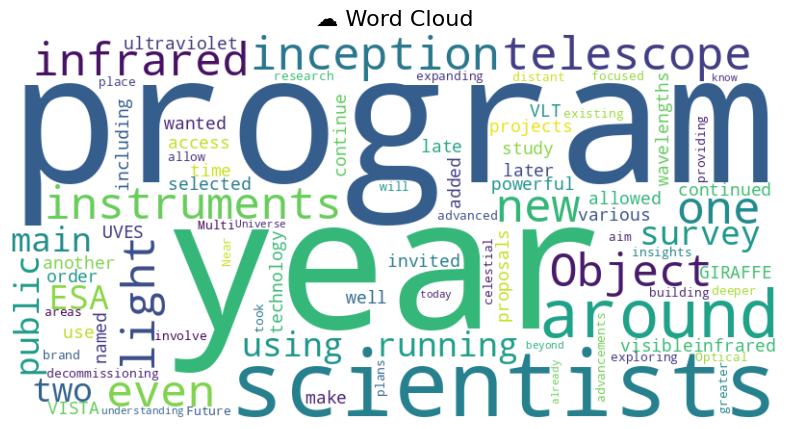

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    """
    Generates and displays a word cloud from the given text.

    Args:
        text (str): The input text to visualize.
    """
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("☁️ Word Cloud", fontsize=16)
    plt.show()

for num_df_file in [0,1]:
    if num_df_file == 0:
        print(f"🚀 {'-'*20} detect for True file {'-'*20}")
    else:
        print(f"🚨 {'-'*20} detect for Fake file {'-'*20}")
    for i in range(10):
        print(f'⏱️ file {i}')
        sample_text = df.iloc[i, num_df_file]  # שורה i, עמודה 0
        print(f"🌟 Word Cloud for row {i+1}")
        generate_wordcloud(sample_text)



In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump, load
def create_vector_from_list(col_values):
    # create vector from texts
    vectorizer = TfidfVectorizer(stop_words='english')  # auto stop word
    X = vectorizer.fit_transform(col_values)
    X = X.toarray()
    dump(vectorizer, 'vectorizer.joblib')
    return X ,vectorizer,vectorizer.get_feature_names_out()
all_texts = list(text_true) + list(text_fake)  # כל הטקסטים ביחד
vectors_all, vectorizer_all, feature_names_all = create_vector_from_list(all_texts)
vectors_t = vectors_all[:len(text_true), :]
vectors_f = vectors_all[len(text_true):, :]

In [158]:
print(len(vectorizer_all.get_feature_names_out()))


9592


In [79]:
len(vectors_t)

95

In [41]:
df_all_txt = pd.DataFrame(vectors_all)
print(f"🧐 Total missing values (NaN) in dataframe: {df_all_txt.isnull().sum().sum()} ❌")


🧐 Total missing values (NaN) in dataframe: 0 ❌


In [163]:
print(df_all_txt.head(2))
# שיטה 1: הדפסת מספר העמודות
print(len(df_all_txt.columns))

# שיטה 2: הדפסת הצורה (מספר שורות, מספר עמודות)
print(df_all_txt.shape)  # התוצאה: (rows, columns)


     0    1         2    3    4    5         6    7    8    9  ...  9335  \
0  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   0.0   
1  0.0  0.0  0.117474  0.0  0.0  0.0  0.090951  0.0  0.0  0.0  ...   0.0   

   9336  9337  9338  9339  9340  9341  9342  9343  cluster  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0        0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0        0  

[2 rows x 9345 columns]
9345
(190, 9345)


In [42]:
df_all_txt.describe()

0           1           2           3           4           5     \
count  190.000000  190.000000  190.000000  190.000000  190.000000  190.000000   
mean     0.006181    0.000703    0.001604    0.000500    0.000878    0.004984   
std      0.024150    0.005724    0.013288    0.006896    0.008719    0.016798   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      0.166426    0.058237    0.129105    0.095054    0.100728    0.102601   

             6           7           8           9     ...        9334  \
count  190.000000  190.000000  190.000000  190.000000  ...  190.000000   
mean     0.003959    0.001525    0.000282    0.000437  ...    0.002201   
std      0.016805    0.009732    0.003882    0.006020  ...    0.007977   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max      0.100446    0.088046    0.053510    0.082981  ...    0.036236   

             9335        9336        9337        9338        9339        9340  \
count  190.000000  190.000000  190.000000  190.000000  190.000000  190.000000   
mean     0.001075    0.000084    0.000084    0.000084    0.000084    0.000084   
std      0.006566    0.001154    0.001154    0.001154    0.001154    0.001154   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      0.043777    0.015901    0.015901    0.015901    0.015901    0.015901   

             9341        9342        9343  
count  190.000000  190.000000  190.000000  
mean     0.000084    0.000084    0.000263  
std      0.001154    0.001154    0.003624  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      0.015901    0.015901    0.049950  

[8 rows x 9344 columns]

In [44]:
df_vec_t_f = df_all_txt
print(f"🔎 Total missing values (NaN) in dataframe: {df_vec_t_f.isnull().sum().sum()} ❌")


df_vectors_t_mean = pd.DataFrame(np.mean(vectors_t, axis=1), columns=['mean_vector_t'])
df_vectors_t_std = pd.DataFrame(np.std(vectors_t, axis=1), columns=['std_vector_t'])
df_vectors_f_mean = pd.DataFrame(np.mean(vectors_f, axis=1), columns=['mean_vector_f'])
df_vectors_f_std = pd.DataFrame(np.std(vectors_t, axis=1), columns=['std_vector_f'])

df_true = pd.DataFrame({
    'mean_vector': df_vectors_t_mean['mean_vector_t'],
    'std_vector': df_vectors_t_std['std_vector_t'],
    'label': 'true'
})

df_fake = pd.DataFrame({
    'mean_vector': df_vectors_f_mean['mean_vector_f'],
    'std_vector': df_vectors_f_std['std_vector_f'],
    'label': 'fake'
})

df_vec_t_f_mean = pd.concat([df_true, df_fake], axis=0).reset_index(drop=True)


print(f"🧐 Total missing values (NaN) in dataframe mean: {df_vec_t_f.isnull().sum().sum()} ❌")
print(df_vec_t_f_mean.iloc[[20,25,34, 40, 102,112,122, 129]])


🔎 Total missing values (NaN) in dataframe: 0 ❌
🧐 Total missing values (NaN) in dataframe mean: 0 ❌
     mean_vector  std_vector label
20      0.000840    0.010311  true
25      0.000901    0.010306  true
34      0.000919    0.010304  true
40      0.001006    0.010296  true
102     0.000747    0.010310  fake
112     0.001112    0.010311  fake
122     0.001150    0.010301  fake
129     0.001232    0.010304  fake


In [156]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(df_all_txt)
df_vec_t_f['cluster'] = kmeans.labels_

print(df_vec_t_f.shape)

(190, 9345)


Number of iterations run: 2
Number of clusters: 2
Random state: 42


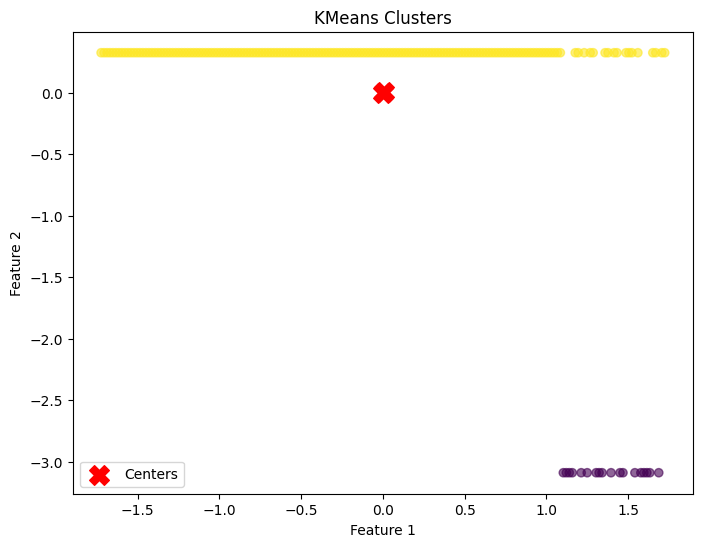

In [157]:
print("Number of iterations run:", kmeans.n_iter_)
print("Number of clusters:", kmeans.n_clusters)
print("Random state:", kmeans.random_state)


import matplotlib.pyplot as plt

def plot_clusters(df, kmeans, normalize=True):
    """
    Plot the clustered data points in 2D with cluster centers.
    
    Args:
        df (pd.DataFrame): Original DataFrame of features.
        kmeans: Fitted KMeans model.
        normalize (bool): Whether the data was normalized (to plot in scaled space).
    """
    if normalize:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X = scaler.fit_transform(df)
    else:
        X = df.values

    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')

    plt.title('KMeans Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# שימוש לדוגמה:
plot_clusters(new_df, k_mean_model_1)


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def train_and_evaluate_random_forest(X, y, test_size=0.2, random_state=42):
    """
    מאמן מודל RandomForestClassifier ומחזיר את דיוק המודל על קבוצת הבדיקה

    פרמטרים:
    - X: numpy array או DataFrame של מאפיינים
    - y: numpy array או סדרה של תוויות (מספריות)
    - test_size: חלק הנתונים שישמש לבדיקה (ברירת מחדל 0.2)
    - random_state: מספר לזרע אקראי (ברירת מחדל 42)

    מחזיר:
    - accuracy: דיוק המודל על קבוצת הבדיקה (float)
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

from xgboost import XGBClassifier

def train_xgboost(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state)
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test))

from lightgbm import LGBMClassifier

def train_lightgbm(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    model = LGBMClassifier(random_state=random_state)
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test))

from sklearn.ensemble import ExtraTreesClassifier

def train_extra_trees(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    model = ExtraTreesClassifier(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def train_neural_net(X, y, test_size=0.2, random_state=42, epochs=20, batch_size=32):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(32, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    return accuracy_score(y_test, y_pred)




In [99]:
from sklearn.preprocessing import LabelEncoder
X = df_vec_t_f_mean.drop(columns = 'label')
y = df_vec_t_f_mean['label']
# יצירת מקודד והמרה
le = LabelEncoder()
y_encoded = le.fit_transform(y)

accuracy = train_lightgbm(X, y_encoded)
print(f"🎯 Cross-validated Accuracy: {accuracy:.4f}")


[LightGBM] [Info] Number of positive: 76, number of negative: 76
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 152, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [100]:
import numpy as np
import pandas as pd
from scipy.stats import entropy


def sigmoid_entropy_like(arr):
    s = np.sum(arr)
    # חישוב סיגמואיד: 1 / (1 + e^(-s))
    return 1 / (1 + np.exp(-s))


# חישוב אנטרופיה לכל שורה במטריצה (ווקטורים טקסט אמיתיים)
entropies_t = np.array([sigmoid_entropy_like(row) for row in vectors_t])

df_vectors_t_stats = pd.DataFrame({
    'mean_vector': np.mean(vectors_t, axis=1),
    'std_vector': np.std(vectors_t, axis=1),
    'var_vector': np.var(vectors_t, axis=1),
    'median_vector': np.median(vectors_t, axis=1),
    'entropy_vector': entropies_t,
    'label': 'true'
})

# חישוב אנטרופיה לכל שורה במטריצה (ווקטורים טקסט מזויפים)
entropies_f = np.array([sigmoid_entropy_like(row) for row in vectors_f])

df_vectors_f_stats = pd.DataFrame({
    'mean_vector': np.mean(vectors_f, axis=1),
    'std_vector': np.std(vectors_f, axis=1),
    'var_vector': np.var(vectors_f, axis=1),
    'median_vector': np.median(vectors_f, axis=1),
    'entropy_vector': entropies_f,
    'label': 'fake'
})

# איחוד טבלאות True ו-Fake
df_stats = pd.concat([df_vectors_t_stats, df_vectors_f_stats], axis=0).reset_index(drop=True)

print(df_stats.head())


   mean_vector  std_vector  var_vector  median_vector  entropy_vector label
0     0.001372    0.010254    0.000105            0.0        0.999997  true
1     0.000898    0.010306    0.000106            0.0        0.999774  true
2     0.000978    0.010299    0.000106            0.0        0.999893  true
3     0.001066    0.010290    0.000106            0.0        0.999953  true
4     0.000841    0.010311    0.000106            0.0        0.999615  true


In [101]:
from itertools import combinations

metrics = [
    'mean_vector',    # ממוצע
    'std_vector',     # סטיית תקן
    'median_vector',  # חציון
    'var_vector',     # שונות
    'entropy_vector'
]
label_col = 'label'

all_combinations = []

for r in range(1, len(metrics)+1):  # 1 עד כל המדדים
    combs = list(combinations(metrics, r))
    for comb in combs:
        cols = list(comb) + [label_col]
        df_subset = df_stats[cols]
        all_combinations.append((comb, df_subset))

for i in all_combinations:
    print(i[0])

('mean_vector',)
('std_vector',)
('median_vector',)
('var_vector',)
('entropy_vector',)
('mean_vector', 'std_vector')
('mean_vector', 'median_vector')
('mean_vector', 'var_vector')
('mean_vector', 'entropy_vector')
('std_vector', 'median_vector')
('std_vector', 'var_vector')
('std_vector', 'entropy_vector')
('median_vector', 'var_vector')
('median_vector', 'entropy_vector')
('var_vector', 'entropy_vector')
('mean_vector', 'std_vector', 'median_vector')
('mean_vector', 'std_vector', 'var_vector')
('mean_vector', 'std_vector', 'entropy_vector')
('mean_vector', 'median_vector', 'var_vector')
('mean_vector', 'median_vector', 'entropy_vector')
('mean_vector', 'var_vector', 'entropy_vector')
('std_vector', 'median_vector', 'var_vector')
('std_vector', 'median_vector', 'entropy_vector')
('std_vector', 'var_vector', 'entropy_vector')
('median_vector', 'var_vector', 'entropy_vector')
('mean_vector', 'std_vector', 'median_vector', 'var_vector')
('mean_vector', 'std_vector', 'median_vector', 'ent

In [102]:
df_stats

mean_vector  std_vector  var_vector  median_vector  entropy_vector label
0       0.001372    0.010254    0.000105            0.0        0.999997  true
1       0.000898    0.010306    0.000106            0.0        0.999774  true
2       0.000978    0.010299    0.000106            0.0        0.999893  true
3       0.001066    0.010290    0.000106            0.0        0.999953  true
4       0.000841    0.010311    0.000106            0.0        0.999615  true
..           ...         ...         ...            ...             ...   ...
185     0.001230    0.010272    0.000106            0.0        0.999990  fake
186     0.001160    0.010280    0.000106            0.0        0.999980  fake
187     0.003246    0.009823    0.000096            0.0        1.000000  fake
188     0.000684    0.010322    0.000107            0.0        0.998328  fake
189     0.000923    0.010304    0.000106            0.0        0.999820  fake

[190 rows x 6 columns]

In [103]:
# הגדרת הפונקציות לכל מודל
model_funcs = {
    'RandomForest': train_and_evaluate_random_forest,
    'XGBoost': train_xgboost,
    'LightGBM': train_lightgbm,
    'ExtraTrees': train_extra_trees,
    'NeuralNetwork':train_neural_net,
}

# מאגר התוצאות הסופי
overall_results = {}

# בחירת פיצ'רים
selected_features = ['mean_vector'	,'std_vector'	,'var_vector',	'median_vector'	,'entropy_vector']  # תוכל להוסיף: 'vector_variance', וכו'

# הכנת X ו-y
X = df_stats[selected_features]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_stats['label'])  # עכשיו y יהיה [0, 1]

# הרצת כל מודל פעם אחת בלבד
for model_name, func in model_funcs.items():
    print(f"\n🚀 Evaluating model: {model_name}")
    
    # הרצת המודל
    accuracy = func(X, y)  # הפונקציה שלך מחזירה את הדיוק (float)

    # שמירת תוצאה
    overall_results[model_name] = {
        'accuracy': accuracy,
        'features': selected_features
    }

    print(f"✅ Model: {model_name} | Accuracy: {accuracy:.4f}")

# סיכום כולל
print("\n🎯 Summary of Results:")
for model_name, result in overall_results.items():
    print(f"{model_name}: Accuracy = {result['accuracy']:.4f} using features {result['features']}")



🚀 Evaluating model: RandomForest
✅ Model: RandomForest | Accuracy: 0.6842

🚀 Evaluating model: XGBoost
✅ Model: XGBoost | Accuracy: 0.7105

🚀 Evaluating model: LightGBM
[LightGBM] [Info] Number of positive: 76, number of negative: 76
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 152, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-02 10:28:01.265697: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
✅ Model: NeuralNetwork | Accuracy: 0.5000

🎯 Summary of Results:
RandomForest: Accuracy = 0.6842 using features ['mean_vector', 'std_vector', 'var_vector', 'median_vector', 'entropy_vector']
XGBoost: Accuracy = 0.7105 using features ['mean_vector', 'std_vector', 'var_vector', 'median_vector', 'entropy_vector']
LightGBM: Accuracy = 0.6053 using features ['mean_vector', 'std_vector', 'var_vector', 'median_vector', 'entropy_vector']
ExtraTrees: Accuracy = 0.7105 using features ['mean_vector', 'std_vector', 'var_vector', 'median_vector', 'entropy_vector']
NeuralNetwork: Accuracy = 0.5000 using features ['mean_vector', 'std_vector', 'var_vector', 'median_vector', 'entropy_vector']


In [104]:
def get_df_for_combination(all_combinations, target_comb):
    for comb_columns, df_subset in all_combinations:
        if comb_columns == target_comb:
            return df_subset
    return None

target_features = ('mean_vector'	,'std_vector'	,	'median_vector','var_vector','entropy_vector'	) # תוכל להוסיף: 'vector_variance', וכו'
df_target = get_df_for_combination(all_combinations, target_features)

df_target

mean_vector  std_vector  median_vector  var_vector  entropy_vector label
0       0.001372    0.010254            0.0    0.000105        0.999997  true
1       0.000898    0.010306            0.0    0.000106        0.999774  true
2       0.000978    0.010299            0.0    0.000106        0.999893  true
3       0.001066    0.010290            0.0    0.000106        0.999953  true
4       0.000841    0.010311            0.0    0.000106        0.999615  true
..           ...         ...            ...         ...             ...   ...
185     0.001230    0.010272            0.0    0.000106        0.999990  fake
186     0.001160    0.010280            0.0    0.000106        0.999980  fake
187     0.003246    0.009823            0.0    0.000096        1.000000  fake
188     0.000684    0.010322            0.0    0.000107        0.998328  fake
189     0.000923    0.010304            0.0    0.000106        0.999820  fake

[190 rows x 6 columns]

In [96]:
!pip install optuna


In [106]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

def optimize_random_forest_with_optuna(X, y, n_trials=30):
    """
    אופטימיזציית RandomForest בעזרת Optuna – על כל הדאטה (בלי ולידציה חיצונית).

    פרמטרים:
    - X: מאפיינים
    - y: תוויות
    - n_trials: מספר ניסיונות (חיפושי פרמטרים)

    מחזיר:
    - best_model: המודל עם הפרמטרים הטובים ביותר
    - best_params: הפרמטרים
    - best_score: הדיוק הממוצע
    """

    def objective(trial):
        # הצעות פרמטרים
        n_estimators = trial.suggest_int("n_estimators", 100, 300)
        max_depth = trial.suggest_int("max_depth", 5, 11)
        max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            random_state=42,
            n_jobs=-1
        )

        # דיוק על כל הדאטה (אפשר להחליף ל-cross_val_score)
        model.fit(X, y)
        preds = model.predict(X)
        acc = accuracy_score(y, preds)
        return acc  # דיוק גבוה יותר = טוב יותר

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    best_params = study.best_params
    best_score = study.best_value

    # אימון המודל הסופי עם הפרמטרים הטובים ביותר
    best_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
    best_model.fit(X, y)

    return best_model, best_params, best_score


In [107]:
# יצירת X ו-y (נניח שכבר שטחת וקטורים)


# הרצת Optuna
best_model, best_params, best_acc = optimize_random_forest_with_optuna(X, y, n_trials=40)

print("🏆 Best RandomForest Model:")
print(f"Params: {best_params}")
print(f"Accuracy: {best_acc:.4f}")


[I 2025-08-02 10:28:25,563] A new study created in memory with name: no-name-05779085-3ec8-43ef-ad8c-62f9f1a4f89f
[I 2025-08-02 10:28:26,340] Trial 0 finished with value: 0.7789473684210526 and parameters: {'n_estimators': 300, 'max_depth': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7789473684210526.
[I 2025-08-02 10:28:26,736] Trial 1 finished with value: 0.8789473684210526 and parameters: {'n_estimators': 155, 'max_depth': 7, 'max_features': None}. Best is trial 1 with value: 0.8789473684210526.
[I 2025-08-02 10:28:27,257] Trial 2 finished with value: 0.8526315789473684 and parameters: {'n_estimators': 207, 'max_depth': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.8789473684210526.
[I 2025-08-02 10:28:27,862] Trial 3 finished with value: 0.7578947368421053 and parameters: {'n_estimators': 246, 'max_depth': 5, 'max_features': None}. Best is trial 1 with value: 0.8789473684210526.
[I 2025-08-02 10:28:28,306] Trial 4 finished with value: 0.7578947368421053 an

🏆 Best RandomForest Model:
Params: {'n_estimators': 245, 'max_depth': 11, 'max_features': None}
Accuracy: 0.9632


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 245,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
----------------------------------------------------------------------
Most used feature index: 1
----------------------------------------------------------------------


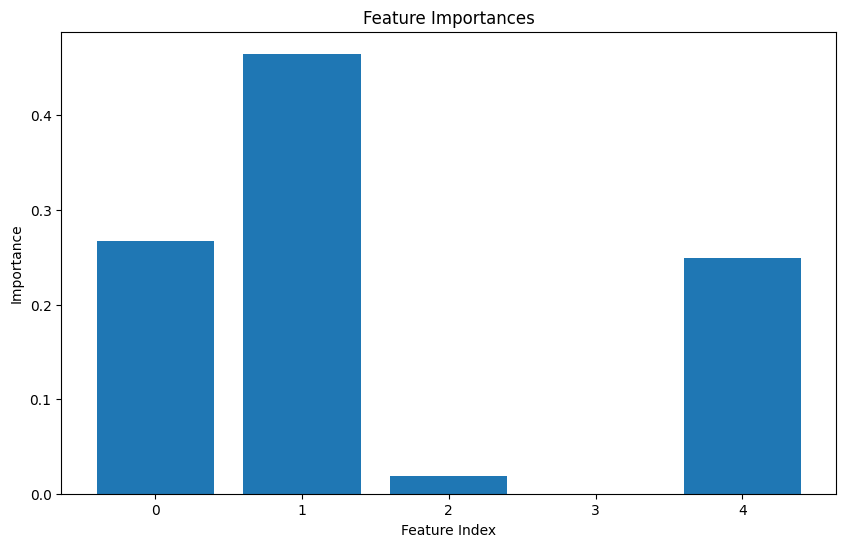

['best_random_forest_model.pkl']

In [114]:
from pprint import pprint
pprint(best_model.get_params())
print('-'*70)
import numpy as np
print(f"Most used feature index: {np.argmax(best_model.feature_importances_)}")
print('-'*70)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()
import joblib
joblib.dump(best_model, "best_random_forest_model.pkl")


In [115]:
import os

folder_path = '/kaggle/input/fake-or-real-the-impostor-hunt/data/test'
lab = {}

for root, dirs, files in os.walk(folder_path):
    # שולף את שם התקיה מתוך הנתיב (התקיה הנוכחית)
    folder_name = os.path.basename(root)
    
    for filename in files:
        file_path = os.path.join(root, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read()
        
        # אם המפתח קיים, מוסיף לרשימה, אחרת יוצר רשימה חדשה
        if folder_name not in lab:
            lab[folder_name] = []
        lab[folder_name].append(content)


In [125]:
import numpy as np
import pandas as pd

# שם המאמר לבדיקה
article_id = 'article_0000'

# תכונות שנבחרו עבור המודל
target_features = selected_features

# הדפסת מספר הטקסטים במאמר
num_texts = len(lab[article_id])
print(f"Number of texts in {article_id}: {num_texts}")

# שליפת שני הטקסטים הראשונים
text1 = lab[article_id][0]
text2 = lab[article_id][1]

# יצירת וקטורים מהטקסטים
vector1, _, _ = create_vector_from_list([text1])
vector2, _, _ = create_vector_from_list([text2])

# התאמת מבנה חד-ממדי
vec1 = vector1 if len(vector1.shape) == 1 else vector1[0]
vec2 = vector2 if len(vector2.shape) == 1 else vector2[0]

# חישוב תכונות לטקסט הראשון
features1 = {
    'mean_vector': np.mean(vec1),
    'std_vector': np.std(vec1),
    'median_vector': np.median(vec1),
    'var_vector': np.var(vec1),
    'entropy_vector': sigmoid_entropy_like(vec1)
}

# חישוב תכונות לטקסט השני
features2 = {
    'mean_vector': np.mean(vec2),
    'std_vector': np.std(vec2),
    'median_vector': np.median(vec2),
    'var_vector': np.var(vec2),
    'entropy_vector': sigmoid_entropy_like(vec2)
}

# יצירת טבלאות נתונים
df1 = pd.DataFrame([features1])
df2 = pd.DataFrame([features2])

# חיזוי עבור טקסט ראשון
prob1 = best_model.predict_proba(df1[target_features])[0][1]
pred1 = int(prob1 > 0.5)

# חיזוי עבור טקסט שני
prob2 = best_model.predict_proba(df2[target_features])[0][1]
pred2 = int(prob2 > 0.5)

# הדפסת תוצאות
print(f"\nText 1: Prediction probability: {prob1:.4f} | Binary prediction: {pred1}")
print(f"Text 2: Prediction probability: {prob2:.4f} | Binary prediction: {pred2}")


Number of texts in article_0000: 2

Text 1: Prediction probability: 0.3643 | Binary prediction: 0
Text 2: Prediction probability: 0.3388 | Binary prediction: 0


In [159]:
print(len(vectorizer_all.get_feature_names_out()))


9592


In [160]:
from joblib import load
import numpy as np
from sklearn.base import ClusterMixin

def predict_and_distance(text: str, vectorizer: str, model: ClusterMixin) -> tuple[int, float]:
    """
    Predict cluster and compute Euclidean distance from cluster center for a given text.

    Args:
        text (str): Input text to classify.
        vectorizer_path (str): Path to saved vectorizer (.joblib).
        model (ClusterMixin): Pre-trained clustering model (e.g., KMeans).

    Returns:
        tuple[int, float]: (predicted_cluster, distance_to_cluster_center)
    """

    vec = vectorizer.transform([text])

    cluster = model.predict(vec)[0]
    center = model.cluster_centers_[cluster]
    distance = np.linalg.norm(vec.toarray() - center)

    return cluster, distance

# טעינת המודל פעם אחת מחוץ לפונקציה (למשל בתחילת הסקריפט)
# from joblib import load
# k_mean_model_1 = load('kmeans_model.joblib')

# שימוש
cluster_id, dist = predict_and_distance(text1, vectorizer_all, k_mean_model_1)

print(f"Cluster: {cluster_id}")
print(f"Distance from center: {dist:.4f}")


ValueError: X has 9592 features, but KMeans is expecting 9343 features as input.

In [156]:
results = []

# רשימת הפיצ'רים שהמודל הוכשר עליהם
features = target_features
#target_features = ('mean_vector'	,'std_vector'	,	'median_vector','var_vector','entropy_vector'	) # תוכל להוסיף: 'vector_variance', וכו'
for article_id, texts in lab.items():
    for idx, text in enumerate(texts):
        try:
            # יצירת הוקטור מהטקסט
            vector, _, _ = create_vector_from_list([text])

            # וקטור חד-ממדי (אם יש מימד נוסף, נבחר את השורה הראשונה)
            vec = vector if len(vector.shape) == 1 else vector[0]



            # יצירת DataFrame עם כל המדדים
            row_df = pd.DataFrame([{
                'article_id': article_id,
                'file_index': idx + 1,
                'mean_vector': np.mean(vec),
                'std_vector': np.std(vec),
                'median_vector': np.median(vec),
                'var_vector': np.var(vec),
                'entropy_vector': sigmoid_entropy_like(vec)
                
            }])

            # בודקים שהעמודות שהמודל מצפה להן אכן קיימות ובאותו סדר
            X_to_predict = row_df[features]

            # חיזוי הסתברותי וקבלת תוצאה בינארית
            prob = best_model.predict_proba(X_to_predict)[0][1]
            binary_pred = int(prob > 0.5)

        except Exception as e:
            print(f"Error processing article {article_id}, file_index {idx + 1}: {e}")

            # במקרה של שגיאה - סיווג 0 ומילוי ערכים חסרים
            binary_pred = 0
            prob = 0.0

            row_df = pd.DataFrame([{
                'article_id': article_id,
                'file_index': idx + 1,
                'mean_vector':0,
                'std_vector': 0,
                'median_vector':0,
                'var_vector': 0,
                'entropy_vector':0
                
            }])
            X_to_predict = row_df[features]

        # הוספת עמודות התוצאה ל-DataFrame
        row_df['prediction'] = binary_pred
        row_df['probability'] = prob

        # שמירת התוצאה לרשימה
        results.append(row_df)

# חיבור כל התוצאות ל-DataFrame אחד
final_results_df = pd.concat(results, ignore_index=True)


Error processing article article_0307, file_index 1: empty vocabulary; perhaps the documents only contain stop words
Error processing article article_0223, file_index 1: empty vocabulary; perhaps the documents only contain stop words
Error processing article article_0229, file_index 1: empty vocabulary; perhaps the documents only contain stop words
Error processing article article_0340, file_index 2: empty vocabulary; perhaps the documents only contain stop words
Error processing article article_0275, file_index 1: empty vocabulary; perhaps the documents only contain stop words


In [157]:
final_results_df ['index_column'] = range(len(final_results_df ))
df_predictions =final_results_df 
df_predictions['probability'].unique

<bound method Series.unique of 0       0.358095
1       0.314286
2       0.000000
3       0.285714
4       0.331905
          ...   
2131    0.304762
2132    0.339048
2133    0.329524
2134    0.314286
2135    0.323810
Name: probability, Length: 2136, dtype: float64>

In [158]:
df_predictions.to_csv('prediction.csv')

In [160]:
import pandas as pd

# נניח ש-df_predictions קיים ויש בו עמודת 'probability'

# קודם מוסיפים עמודת index_column אם לא קיימת
df_predictions['index_column'] = range(len(df_predictions))

# יוצרים עמודה שמזהה את הזוג - כלומר כל שני אינדקסים שייכים לאותו זוג
df_predictions['pair_id'] = df_predictions['index_column'] // 2

# עכשיו עבור כל זוג בוחרים את השורה עם ה-probability הגבוה ביותר
idx_max_prob = df_predictions.groupby('pair_id')['probability'].idxmax()

# יוצרים דאטהפריים חדש עם השורות האלו
df_best_predictions = df_predictions.loc[idx_max_prob].reset_index(drop=True)

# אם רוצים, אפשר גם למחוק את העמודה 'pair_id' ו'index_column' כדי לנקות
df_best_predictions = df_best_predictions.drop(columns=['pair_id', 'index_column'])

df_best_predictions


article_id  file_index  mean_vector  std_vector  median_vector  \
0     article_0192           1     0.091932    0.035457       0.077615   
1     article_0956           2     0.079797    0.067097       0.057354   
2     article_0266           2     0.090203    0.038456       0.070535   
3     article_0435           2     0.088059    0.050546       0.070014   
4     article_1054           1     0.062875    0.043921       0.046676   
...            ...         ...          ...         ...            ...   
1063  article_0096           1     0.064602    0.030900       0.050189   
1064  article_0893           2     0.073986    0.034535       0.064150   
1065  article_0821           1     0.092399    0.047066       0.075378   
1066  article_0472           1     0.070757    0.027817       0.062137   
1067  article_0499           2     0.088484    0.045514       0.065233   

      var_vector  entropy_vector  prediction  probability  
0       0.001257        0.999923           0     0.358095  
1       0.004502        0.999352           0     0.285714  
2       0.001479        0.999916           0     0.358095  
3       0.002555        0.999805           0     0.333333  
4       0.001929        0.999977           0     0.339048  
...          ...             ...         ...          ...  
1063    0.000955        0.999997           0     0.348571  
1064    0.001193        0.999985           0     0.339048  
1065    0.002215        0.999815           0     0.333333  
1066    0.000774        0.999995           0     0.339048  
1067    0.002072        0.999869           0     0.323810  

[1068 rows x 9 columns]

In [166]:
df_best_predictions[['article_id','prediction']]

article_id  prediction
0     article_0192           0
1     article_0956           0
2     article_0266           0
3     article_0435           0
4     article_1054           0
...            ...         ...
1063  article_0096           0
1064  article_0893           0
1065  article_0821           0
1066  article_0472           0
1067  article_0499           0

[1068 rows x 2 columns]

In [172]:
# נניח שיש לך בעמודה 'article_id' את מזהה המאמר
# נחלץ את התחזית המקסימלית לכל article_id
df_unique = final_results_df.groupby('article_id')['prediction'].max().reset_index()

# צור עמודת id רצה
df_unique['id'] = range(0, len(df_unique) )

# בחר עמודות לשמירה
df_to_save = df_unique[['id', 'prediction']]

print(df_to_save)
df_to_save.to_csv('predictions.csv', index=False)


        id  prediction
0        0           2
1        1           2
2        2           2
3        3           2
4        4           2
...    ...         ...
1063  1063           2
1064  1064           2
1065  1065           2
1066  1066           2
1067  1067           2

[1068 rows x 2 columns]


In [97]:
results = []


for article_id, texts in lab.items():
    for idx, text in enumerate(texts):
        try:
            vector, _, _ = create_vector_from_list([text])
            vec = vector if len(vector.shape) == 1 else vector[0]

            X_to_predict = vec

            # חיזוי קלאסטר עם k_mean_model_1
            cluster_label = k_mean_model_1.predict(X_to_predict)[0]

            # חישוב מרחק למרכז הקלאסטר
            distances = k_mean_model_1.transform(X_to_predict)
            distance_to_center = distances[0][cluster_label]

            # אפשר להוסיף פה גם חיזוי הסתברותי אם יש, אבל ב-KMeans אין.
            # לכן נוסיף רק את התווית והמרחק.

        except Exception as e:
            print(f"Error processing article {article_id}, file_index {idx + 1}: {e}")

            cluster_label = -1  # או ערך שמתאים ל"שגיאה"
            distance_to_center = np.nan

            X_to_predict = vec

        row_df['cluster'] = cluster_label
        row_df['distance_to_center'] = distance_to_center

        results.append(row_df)

final_results_df = pd.concat(results, ignore_index=True)


NameError: name 'lab' is not defined